\begin{flushright}20211108 Donghyuk Jung
\end{flushright}

# Genetic Algorithm

Implement Genetic algorithm to seek the global minimum of the following functions : 

$f(x)=2(x-0.5)^2+1\: on \: [0,1]$ 

$f(x)=|x-0.5|(cos(12\pi[x-0.5])+1.2)\: on \: [0,1]$ 

Discuss its performance depending on various control parameters such as length of  genotype, population size, mutation probability, crossover probability and so on

# Implementation

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.tri as tri 
import math as m
import time as t
import random as r
from tabulate import tabulate

Define objective function

In [ ]:
def f1(x):
    return 2*(x-0.5)**2+1


def f2(x):
    return np.abs(x-0.5)*(np.cos(12*np.pi*(x-0.5))+1.2)


Define parameters

In [ ]:
L, N = 16, 50
p_mutate, p_cross = 1e-2, 0.8
factor = [float(2**i) for i in reversed(range(L))]
wgt = 0.3
selection_weight = [float(wgt*(1-wgt)**i) for i in range(N)]


def encode(val):  # Encode chromosome
    gene = [0 for _ in range(L)]
    val *= float(2**L-1)
    for i in range(L):
        gene[i], val = divmod(val, factor[i])
    return gene


def decode(gene):  # Decode chromosome
    val = 0
    for i in range(L):
        val += gene[i]*factor[i]
    val /= float(2**L-1)
    return val


def fitness(p, f):  # Evaluate fitness
    key = []
    for chromosome in p:
        val = decode(chromosome)
        key.append(f(val))
    return key


def mutate(p):
    for chromosome in p:
        if r.uniform(0, 1) > p_mutate:
            continue
        i = r.randint(0, L-1)
        chromosome[i] = (chromosome[i]+1) % 2


def crossover(p, a, b):
    cross = []
    if r.uniform(0, 1) > p_cross:
        return 0, cross
    i = r.randint(0, L-1)
    cross = [p[a][:i]+p[b][i:],
             p[b][:i]+p[a][i:]]
    return 1, cross


In [315]:
def plot(f):
    x = np.linspace(0, 1, 100)
    y = f(x)
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    # ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    plt.plot(x, y, 'b')

In [290]:
def GA(f, gen):
    population = [[r.randint(0, 1) for _ in range(L)] for _ in range(N)]
    for i in range(gen):
        flag_mutate, flag_cross = 0, 0
        calculated_fitness = fitness(population, f)
        maintained_parents = [i for _, i in sorted(
            zip(calculated_fitness, population))]

        mutate(maintained_parents)
        [a, b] = r.choices([i for i in range(0, N)],
                           weights=selection_weight, k=2)
        flag_cross, cross = crossover(maintained_parents, a, b)
        population = maintained_parents[:N - (flag_mutate+flag_cross)*len(cross)]+cross
    return decode(population[0])


def GAtest(f, l=L, n=N, pm=p_mutate, pc=p_cross, gen=100):
    factor = [float(2**i) for i in reversed(range(L))]
    wgt = 0.3
    selection_weight = [float(wgt*(1-wgt)**i) for i in range(N)]
    count = 0
    t = 500
    for i in range(t):
        if np.abs(GA(f, gen) - 0.5) < 0.01:
            count += 1
    return round(count*100.0/t, 2)


# Result
We ran the genetic algorithm 500 times and measured the accuracy by the number of times the global minimum came out.

## $f(x)=2(x-0.5)^2+1\: on \: [0,1]$ 

the global minimum is $1$ at $x=0.5$

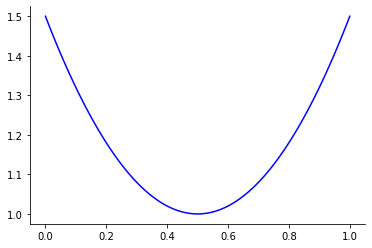

In [313]:
plot(f1)

### Along Population size

In [293]:
print("L : {}, p_mutate : {}, p_cross : {}, gen : {}".format(16,0.01,0.8,50))
print("N : {:3d} -> Accuracy : {:.2f}%".format(20,GAtest(f1,16,20,0.01,0.8,50)))
print("N : {:3d} -> Accuracy : {:.2f}%".format(50,GAtest(f1,16,50,0.01,0.8,50)))
print("N : {:3d} -> Accuracy : {:.2f}%".format(100,GAtest(f1,16,100,0.01,0.8,50)))
print("L : {}, p_mutate : {}, p_cross : {}, gen : {}".format(16,0.01,0.8,200))
print("N : {:3d} -> Accuracy : {:.2f}%".format(20,GAtest(f1,16,20,0.01,0.8,200)))
print("N : {:3d} -> Accuracy : {:.2f}%".format(50,GAtest(f1,16,50,0.01,0.8,200)))
print("N : {:3d} -> Accuracy : {:.2f}%".format(100,GAtest(f1,16,100,0.01,0.8,200)))

L : 16, p_mutate : 0.01, p_cross : 0.8, gen : 50
N :  20 -> Accuracy : 89.20%
N :  50 -> Accuracy : 91.00%
N : 100 -> Accuracy : 90.00%
L : 16, p_mutate : 0.01, p_cross : 0.8, gen : 200
N :  20 -> Accuracy : 99.20%
N :  50 -> Accuracy : 99.40%
N : 100 -> Accuracy : 99.00%


### Along crossover probability

In [298]:
print("L : {}, N : {:3d}, p_mutate : {}, gen : {}".format(16,50,0.01,50))
print("p_cross : {} -> Accuracy : {:.2f}%".format(0.5,GAtest(f1,16,50,0.01,0.5,50)))
print("p_cross : {} -> Accuracy : {:.2f}%".format(0.7,GAtest(f1,16,50,0.01,0.7,50)))
print("p_cross : {} -> Accuracy : {:.2f}%".format(0.9,GAtest(f1,16,50,0.01,0.9,50)))

L : 16, N :  50, p_mutate : 0.01, gen : 50
p_cross : 0.5 -> Accuracy : 89.00%
p_cross : 0.7 -> Accuracy : 88.00%
p_cross : 0.9 -> Accuracy : 90.20%


## $f(x)=|x-0.5|(cos(12\pi[x-0.5])+1.2)\: on \: [0,1]$ 

the global minimum is $0$ at $x=0.5$

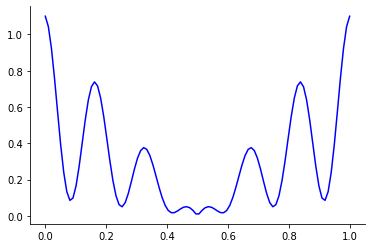

In [314]:
plot(f2)

### Along Population size

In [294]:
print("L : {}, p_mutate : {}, p_cross : {}, gen : {}".format(16,0.01,0.8,50))
print("N : {:3d} -> Accuracy : {:.2f}%".format(20,GAtest(f2,16,20,0.01,0.8,50)))
print("N : {:3d} -> Accuracy : {:.2f}%".format(50,GAtest(f2,16,50,0.01,0.8,50)))
print("N : {:3d} -> Accuracy : {:.2f}%".format(100,GAtest(f2,16,100,0.01,0.8,50)))
print("L : {}, p_mutate : {}, p_cross : {}, gen : {}".format(16,0.01,0.8,200))
print("N : {:3d} -> Accuracy : {:.2f}%".format(20,GAtest(f2,16,20,0.01,0.8,200)))
print("N : {:3d} -> Accuracy : {:.2f}%".format(50,GAtest(f2,16,50,0.01,0.8,200)))
print("N : {:3d} -> Accuracy : {:.2f}%".format(100,GAtest(f2,16,100,0.01,0.8,200)))

L : 16, p_mutate : 0.01, p_cross : 0.8, gen : 50
N :  20 -> Accuracy : 60.80%
N :  50 -> Accuracy : 61.40%
N : 100 -> Accuracy : 62.20%
L : 16, p_mutate : 0.01, p_cross : 0.8, gen : 200
N :  20 -> Accuracy : 63.40%
N :  50 -> Accuracy : 67.60%
N : 100 -> Accuracy : 65.20%


### Along crossover probability

In [299]:
print("L : {}, N : {:3d}, p_mutate : {}, gen : {}".format(16,50,0.01,200))
print("p_cross : {} -> Accuracy : {:.2f}%".format(0.5,GAtest(f2,16,50,0.01,0.5,200)))
print("p_cross : {} -> Accuracy : {:.2f}%".format(0.7,GAtest(f2,16,50,0.01,0.7,200)))
print("p_cross : {} -> Accuracy : {:.2f}%".format(0.9,GAtest(f2,16,50,0.01,0.9,200)))

L : 16, N :  50, p_mutate : 0.01, gen : 200
p_cross : 0.5 -> Accuracy : 65.80%
p_cross : 0.7 -> Accuracy : 63.80%
p_cross : 0.9 -> Accuracy : 64.40%
